# Zadania do tematu "Przygotowanie danych i inżynieria cech"

W tym Notebooku znajdują się zadania do tematu "Przygotowanie danych i inżynieria cech", które mają na celu pokazać co można zrobić przed wykorzystaniem danych w uczeniu maszynowym.

# Zbiór danych

Będziemy korzystać ze zbioru danych "TMDB Movies Dataset" dostępnego pod linkiem https://www.kaggle.com/datasets/ahsanaseer/top-rated-tmdb-movies-10k. Jeżeli ktoś ma konto na Kaggle to może pobrać dane w postaci `.csv` z tej platformy, a w innym przypadku można pobrać odpowiedni plik `.csv` z repozytorium do kursu (w folderze z zadaniami `Tasks` jest podfolder `dane`, a w nim plik `top10K-TMDB-movies.csv`).

Zbiór danych zawiera informacje na temat 10000 filmów, które miały najwyższe oceny przed 26.07.2022.

Opis poszczególnych kolumn:
- `ID` : Numer ID filmu na stronie internetowej.
- `title`: Nazwa filmu.
- `genre`: Gatunek filmu (kryminał, przygodowy, itp.).
- `original_language`: Oryginalny język, w którym film został wydany.
- `overview`: Streszczenie fabuły filmu.
- `popularity`: Popularność filmu.
- `release_date`: Data premiery filmu.
- `vote_average`: Średnia ocena filmu.
- `vote_count`: Liczba oddanych głosów na film.

Dane z kolumny `vote_average` potraktujemy jako wartości, którą chcemy predykować.

# 1. Wczytaj dane z pliku do postaci pandas DataFrame. Następnie wykorzystaj head(), żeby wyświetlić pierwsze 5 wierszy.

In [92]:
# Wpisz swój kod poniżej
import pandas as pd
import os

df = pd.read_csv(os.path.join("dane", "top10K-TMDB-movies.csv"))

print(df.head())

      id                        title                 genre original_language  \
0    278     The Shawshank Redemption           Drama,Crime                en   
1  19404  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance                hi   
2    238                The Godfather           Drama,Crime                en   
3    424             Schindler's List     Drama,History,War                en   
4    240       The Godfather: Part II           Drama,Crime                en   

                                            overview  popularity release_date  \
0  Framed in the 1940s for the double murder of h...      94.075   1994-09-23   
1  Raj is a rich, carefree, happy-go-lucky second...      25.408   1995-10-19   
2  Spanning the years 1945 to 1955, a chronicle o...      90.585   1972-03-14   
3  The true story of how businessman Oskar Schind...      44.761   1993-12-15   
4  In the continuing saga of the Corleone crime f...      57.749   1974-12-20   

   vote_average  vote_coun

# 2. Podziel zbiór danych na wartość poszukiwaną `y` i dane `X`. Następnie podziel dane na zbiór treningowy, walidacyjny i testowy w stosunku 80:10:10. Użyj random_state=42

In [93]:
# Wpisz swój kod poniżej
from sklearn.model_selection import train_test_split

X = df.drop(['vote_average'], axis=1)
y = df['vote_average']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Wyświetl typy danych w każdej kolumnie oraz statystyki poszczególnych kolumn w zbiorze treningowym, walidacyjnym i testowym.

Czy wszystkie filmy mają wartości w każdej kolumnie?

In [94]:
# Wpisz swój kod poniżej
X_test.info()

X_test.isnull().sum()

X_test.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 4343 to 2908
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   title              1000 non-null   object 
 2   genre              998 non-null    object 
 3   original_language  1000 non-null   object 
 4   overview           998 non-null    object 
 5   popularity         1000 non-null   float64
 6   release_date       1000 non-null   object 
 7   vote_count         1000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 70.3+ KB


,id,popularity,vote_count
count,1000.000000,1000.000000,1000.000000
mean,161825.662000,39.000695,1582.429000
std,209917.795507,224.783739,2683.448327
min,12.000000,0.600000,200.000000
25%,9922.750000,9.277000,316.000000
50%,32004.500000,13.569500,617.500000
75%,310359.750000,27.029000,1486.000000
max,928381.000000,5278.336000,25020.000000


# 4. Pierwszą czynnością po uzyskaniu danych jest analiza, które kolumny mogą nam się przydać i w jakiej formie to powinno być. Data wydania filmu jest w formie `object`, więc zamień dane z kolumny `release_date` na typ `datetime`, aby ułatwić jej wykorzystanie.

Nadpisz obecną kolumnę `release_date` we wszystkich zbiorach (treningowym, walidacyjnym i testowym)

In [95]:
# Wpisz swój kod poniżej
X_train['release_date'] = pd.to_datetime(X_train['release_date'])
X_val['release_date'] = pd.to_datetime(X_val['release_date'])
X_test['release_date'] = pd.to_datetime(X_test['release_date'])

# 5. Wypisz unikalne kategorie filmów w zbiorze treningowym `genre` i oryginalne języki `original_language`. Czy widzisz pewien problem z obecną formą kategorii filmów?

**Podpowiedź:** możesz ustawić parametry, aby zmienić liczbę wyświetlanych w konsoli wartości. Dla `numpy` możesz wykorzystać
```Python
import numpy as np
np.set_printoptions(threshold=np.inf)
```

In [96]:
# Wpisz swój kod poniżej
import numpy as np
np.set_printoptions(threshold=np.inf)

print(X_train['genre'].unique())
print(X_train['genre'].nunique())

['Horror,Thriller' 'Drama' 'War,Drama' 'Adventure,Family,Fantasy'
 'Adventure,Comedy,Family,Science Fiction' 'Thriller,Crime,Drama' 'Comedy'
 'Drama,Romance' 'Adventure,Animation,Family'
 'Crime,Drama,Mystery,Thriller' 'Romance,Drama' 'Romance,Comedy,Drama'
 'Science Fiction,Action,War' 'Crime,History' 'Thriller,Horror'
 'Comedy,Drama,Romance' 'Action,Adventure,Drama,Music,Romance,Western'
 'Thriller,Action,Adventure,Science Fiction' 'Action,Comedy,Fantasy'
 'Comedy,Family' 'Thriller,Horror,Comedy' 'Action,Comedy'
 'Family,Animation,Comedy' 'Action,Adventure,Comedy,Science Fiction'
 'Comedy,Science Fiction,Fantasy' 'Drama,Crime,Comedy' 'Action,Crime'
 'Horror,Fantasy,Comedy' 'Drama,Crime' 'Drama,Thriller'
 'Drama,Thriller,Crime' 'Adventure,Family,Drama,Comedy' 'Comedy,Crime'
 'Crime,Drama,Thriller' 'Drama,History,War' 'Animation,Family'
 'Drama,History,Adventure' 'History,Drama' 'War,Horror,History,Drama'
 'Horror,Mystery' 'Science Fiction,Adventure'
 'Animation,Adventure,Family,Fantas

In [97]:
print(X_train['original_language'].unique())
print(X_train['original_language'].nunique())

['en' 'it' 'fr' 'es' 'ko' 'ru' 'de' 'hi' 'ja' 'pt' 'zh' 'sh' 'nl' 'sv'
 'id' 'cn' 'pl' 'el' 'fa' 'da' 'tr' 'fi' 'no' 'eu' 'et' 'la' 'th' 'hu'
 'af' 'ro' 'sr' 'ml' 'cs' 'is' 'te' 'uk' 'bs' 'xx' 'ar' 'ab' 'bn']
41


# 6. Zacznijmy od pozyskania dodatkowych informacji z kategorii danego filmu. Obecnie wszystkie typy są oddzielane od siebie przecinkami w jednym stringu, co dla nas powoduje powstanie olbrzymiej ilości różnych wartości (dlatego nie miałoby sensu nadawać im teraz wartości liczbowej) - dodatkowo nie ma zachowanej kolejności, więc możesz sprawdzić, że są filmy otagowane jako `'Action,Comedy'` i `'Comedy,Action'`.

## 6.1. Jeżeli w poprzednim zadaniu nie zapisałeś unikalnych wartości kategorii filmów do zmiennej to zrób to teraz. Następnie podziel wszystkie stringi w miejscu wystąpienia przecinka i utwórz listę unikalnych wartości.

Ile unikalnych kategorii istnieje?

In [98]:
# Wpisz swój kod poniżej
unikalne_wczytane_kategorie = X_train['genre'].unique()

kategorie = []

for kategoria in unikalne_wczytane_kategorie:
    kat_as_str = str(kategoria)
    kategorie_podzielone = kat_as_str.split(',')
    for kat in kategorie_podzielone:
        if kat not in kategorie:
            kategorie.append(kat)

print(kategorie)
print(len(kategorie))

['Horror', 'Thriller', 'Drama', 'War', 'Adventure', 'Family', 'Fantasy', 'Comedy', 'Science Fiction', 'Crime', 'Romance', 'Animation', 'Mystery', 'Action', 'History', 'Music', 'Western', 'TV Movie', 'nan']
19


Jak widzisz, udało nam się w ten sposób bardzo zredukować liczbę unikalnych kategorii filmowych. Ale co dalej? Czy zmapowanie tych wartości i następnie sumowanie, gdy film ma więcej niż 1 kategorię byłoby miarodajne? No raczej nie, dlatego wykorzystamy `one-hot encoding`. Na czym to polega? W naszym przypadku traktujemy każdy film jako wektor, który przechowuje wartości binarne - 0 lub 1, które oznaczają czy dany film należy do pewnej kategorii (wtedy 1) lub nie należy (to wtedy 0).

Zwróć uwagę, że pojawiła się wartość `nan` w liście unikalnych kategorii. Wynika ona z tego, że dany film nie miał zdefiniowanych kategorii. Później zobaczymy jakie są techniki uzupełniania brakujących danych.

Ze względu na brakujące wartości należy albo sprawdzać czy wartość z `row["genre"]` jest typu `float` i wtedy ustawiać kolumnę `["genre_nan"]` na 1 lub konwertować wartości z tej kolumny na `string` i traktować wszystkie wartości równo.

## 6.2. Utwórz kolumnę `"number_of_genres"`, w której umieścisz liczbę kategorii danego filmu.

**Podpowiedź**: możesz wykorzystać `.str.count('znak')`, żeby policzyć wystąpienia danego znaku, np. `df['kolumna_1'].str.count('a')` zwróci liczbę wystąpień litery `a` w kolumnie `kolumna_1`.

In [99]:
# Wpisz swój kod poniżej
X_train["number_of_genres"] = X_train["genre"].str.count(",") + 1
X_val["number_of_genres"] = X_val["genre"].str.count(",") + 1
X_test["number_of_genres"] = X_test["genre"].str.count(",") + 1

In [100]:
X_train["number_of_genres"].describe()

count    7999.000000
mean        2.562570
std         1.084365
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: number_of_genres, dtype: float64

## 6.3. Przeprowadź one-hot encodding, tak aby powstały nowe kolumny odpowiadające kategoriom filmów.

**Podpowiedź**: możesz wykorzystać `.str.get_dummies(sep=',')`, które utworzy nowy dataframe i wypełni kolumny dla poszczególnych wartości, które mogą być oddzielone od siebie przecinkami. Do łączenia DataFrames służy `.join`.

Na koniec sprawdź przy pomocy `describe()` jakie są wartości w poszczególnych kolumnach.

In [101]:
# Wpisz swój kod poniżej
X_train = X_train.join(X_train["genre"].str.get_dummies(sep=','))
X_val = X_val.join(X_val["genre"].str.get_dummies(sep=','))
X_test = X_test.join(X_test["genre"].str.get_dummies(sep=','))

In [102]:
pd.set_option("display.max_columns", None)
X_train.describe()

,id,popularity,release_date,vote_count,number_of_genres,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,8000.000000,8000.000000,8000,8000.000000,7999.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,160781.864000,34.912560,2003-10-01 17:03:28.800000,1523.358125,2.562570,0.219625,0.154250,0.087750,0.373875,0.144125,0.455375,0.115125,0.108625,0.049000,0.135875,0.028500,0.084875,0.16800,0.112750,0.013000,0.263500,0.032250,0.015750
min,6.000000,0.600000,1902-04-17 00:00:00,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10101.000000,9.165750,1997-02-03 18:00:00,315.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29124.500000,13.593500,2008-12-25 00:00:00,578.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,310178.000000,25.276500,2015-12-25 00:00:00,1435.250000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
max,934761.000000,10436.917000,2022-07-13 00:00:00,31917.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
std,211441.002635,222.367035,NaN,2605.256645,1.084365,0.414018,0.361211,0.282949,0.483861,0.351238,0.498036,0.319193,0.311188,0.215882,0.342677,0.166407,0.278713,0.37389,0.316307,0.113281,0.440559,0.176674,0.124515


# 7. Teraz przejdźmy do tego w jakim języku powstał film. Wykorzystaj metodę `.value_counts()`, aby wypisać liczbę filmów w poszczególnym języku.

In [103]:
# Wpisz swój kod poniżej
print(X_train['original_language'].value_counts())

original_language
en    6239
fr     561
it     341
ja     219
es     162
de      84
ko      53
cn      47
ru      43
zh      42
pt      32
hi      31
sv      27
da      25
no      13
pl      10
nl      10
tr       8
fa       7
th       6
id       5
hu       5
el       4
fi       3
cs       3
te       2
is       2
eu       2
sr       2
et       1
sh       1
af       1
la       1
ml       1
ro       1
uk       1
bs       1
xx       1
ar       1
ab       1
bn       1
Name: count, dtype: int64


## 7.1 Jak widzisz większość filmów jest w języku angielskim, dlatego przy podziale na grupy nie włączymy angielskiego do grupy europejskiej, aby nie wpływał on na inne języki (inne języki stanowiłyby wówczas mniejszość). Propozycja podziału na grupy językowe jest umieszczona poniżej. Na tej podstawie utwórz nową kolumnę (jeżeli w zbiorze testowym lub walidacyjnym są inne języki to dodaj je do "Other"), a następnie wykorzystaj `LabelEncoder`, żeby zamienić nazwę grupy na wartość liczbową (zapisz je do kolumny `'language_group_enc'`)

In [104]:
# Uruchom ten fragment kodu
language_groups = {
    "en": ["en"],
    "fr": ["fr"],
    "it": ["it"],
    "ja": ["ja"],
    "es": ["es"],
    "European": ["de", "nl", "sv", "da", "no", "pl", "hu", "fi", "cs", "is", "et", "sh", "ru", "bs", "uk", "ro"],
    "Asian": ["ko", "cn", "zh", "hi", "th", "id", "tr", "fa", "te", "bn", "ab", "ml"],
    "Other": ["pt", "af", "ar", "xx", "la"]
}

In [105]:
# Wpisz swój kod poniżej
group_map = {}
for group, languages in language_groups.items():
    for lang in languages:
        group_map[lang] = group

def get_group(language_name):
    return group_map.get(language_name, "Other")

def add_column(df):
    df['language_group'] = df['original_language'].apply(get_group)

add_column(X_train)
add_column(X_val)
add_column(X_test)

In [106]:
print(X_train['language_group'].head(10))

9254    en
1561    en
1670    en
6087    en
6669    en
5933    en
8829    it
7945    it
3508    en
2002    en
Name: language_group, dtype: object


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['language_group_enc'] = le.fit_transform(X_train['language_group'])
X_val['language_group_enc'] = le.transform(X_val['language_group'])
X_test['language_group_enc'] = le.transform(X_test['language_group'])

In [108]:
print(X_train[['language_group_enc', 'language_group']].head(10))

      language_group_enc language_group
9254                   3             en
1561                   3             en
1670                   3             en
6087                   3             en
6669                   3             en
5933                   3             en
8829                   6             it
7945                   6             it
3508                   3             en
2002                   3             en


# 8. Następnym krokiem na naszej liście jest praca na wartościach liczbowych. Utwórz 2 nowe kolumny: `vote_count_scaled` oraz `vote_count_standardized`, w których będą dane po odpowiednio: `MinMaxScaler` i `StandardScaler` z biblioteki `sklearn.preprocessing`.

**Pamiętaj, że na zbiorze treningowym należy wykorzystać `fit_transform`, a na pozostałych zbiorach `transform`, bo na zbiorze treningowym dopasowujemy skaler, a następnie tylko go wykorzystujemy do przeskalowania.**

MinMaxScaler przeskalowuje dane do zakresu [0;1], a StandardScaler skaluje tak, aby wartość średnia wynosiła 0, a odchylenie standardowe 1.

In [109]:
print(X_train['vote_count'].info())

<class 'pandas.core.series.Series'>
Index: 8000 entries, 9254 to 7270
Series name: vote_count
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 383.0 KB
None


In [110]:
# Wpisz swój kod poniżej
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max = MinMaxScaler()
standard = StandardScaler()

X_train['vote_count_scaled'] = min_max.fit_transform(X_train[['vote_count']])
X_val['vote_count_scaled'] = min_max.transform(X_val[['vote_count']])
X_test['vote_count_scaled'] = min_max.transform(X_test[['vote_count']])

X_train['vote_count_standardized'] = standard.fit_transform(X_train[['vote_count']])
X_val['vote_count_standardized'] = standard.transform(X_val[['vote_count']])
X_test['vote_count_standardized'] = standard.transform(X_test[['vote_count']])

In [111]:
print(X_train[['vote_count', 'vote_count_scaled', 'vote_count_standardized']].describe())

         vote_count  vote_count_scaled  vote_count_standardized
count   8000.000000        8000.000000             8.000000e+03
mean    1523.358125           0.041724             1.598721e-17
std     2605.256645           0.082141             1.000063e+00
min      200.000000           0.000000            -5.079887e-01
25%      315.000000           0.003626            -4.638444e-01
50%      578.000000           0.011918            -3.628883e-01
75%     1435.250000           0.038946            -3.382148e-02
max    31917.000000           1.000000             1.166700e+01


# 9. Wyświetl histogramy dla każdej z 3 kolumn: `"vote_count"`, `"vote_count_scaled"` i `"vote_count_standardized"`. Zmień liczbę wyświetlanych przedziałów (bins) na 20. Następnie wykorzystaj `vote_count_standardized` i utwórz `vote_count_binned_w` oraz `vote_count_binned_c`, które odpowiednio będą miały podział na 20 binów o równej długości i 20 binów o równej liczebności.

**Podpowiedź:** do utworzenia labeli od 0 do 19 możesz wykorzystać `range(20)`.

<Axes: >

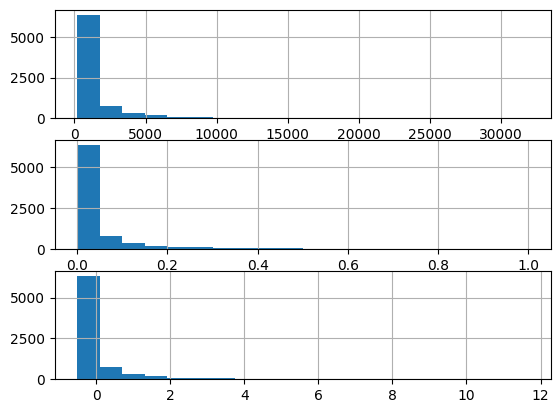

In [112]:
# Wpisz swój kod poniżej
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1)
X_train['vote_count'].hist(ax=ax[0], bins=20)
X_train['vote_count_scaled'].hist(ax=ax[1], bins=20)
X_train['vote_count_standardized'].hist(ax=ax[2], bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x70d329b78310>,
 'caps': [<matplotlib.lines.Line2D at 0x70d329b62dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x70d32a5d6fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x70d322ef1f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x70d322ef27d0>],
 'means': []}

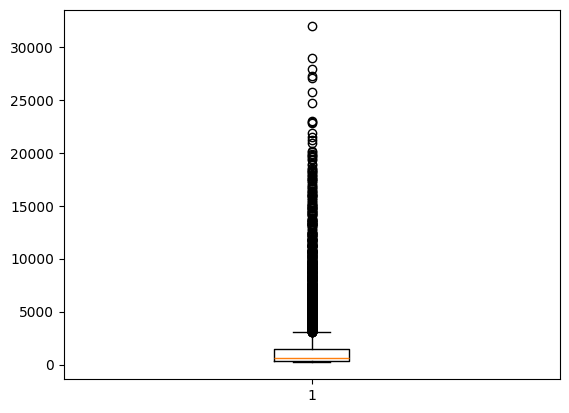

In [113]:
plt.boxplot(X_train['vote_count'])

In [114]:
X_train['vote_count_binned_w'] = pd.cut(X_train['vote_count_standardized'], bins=20, labels=range(20))
X_val['vote_count_binned_w'] = pd.cut(X_val['vote_count_standardized'], bins=20, labels=range(20))
X_test['vote_count_binned_w'] = pd.cut(X_test['vote_count_standardized'], bins=20, labels=range(20))

X_train['vote_count_binned_c'] = pd.qcut(X_train['vote_count_standardized'], q=20, labels=range(20))
X_val['vote_count_binned_c'] = pd.qcut(X_val['vote_count_standardized'], q=20, labels=range(20))
X_test['vote_count_binned_c'] = pd.qcut(X_test['vote_count_standardized'], q=20, labels=range(20))

In [115]:
print(X_train[['vote_count_binned_w', 'vote_count_binned_c']].describe())

        vote_count_binned_w  vote_count_binned_c
count                  8000                 8000
unique                   20                   20
top                       0                    0
freq                   6341                  416


<Axes: >

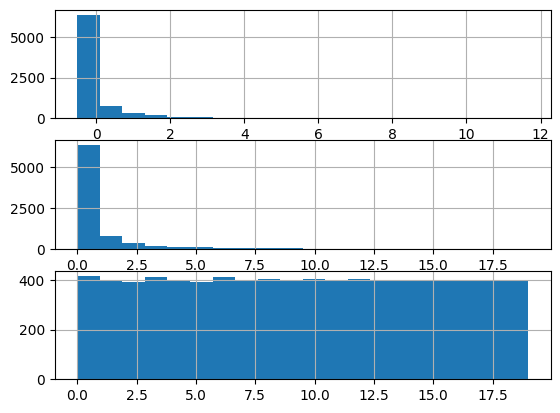

In [116]:
fig, ax = plt.subplots(3,1)
X_train['vote_count_standardized'].hist(ax=ax[0], bins=20)
X_train['vote_count_binned_w'].hist(ax=ax[1], bins=20)
X_train['vote_count_binned_c'].hist(ax=ax[2], bins=20)

# 10. Teraz przetestujemy dodawanie brakujących wartości. Wiemy, że w `"genre"` pojawiały się braki, więc spróbujemy dodać informację o ilości kategorii dla tych filmów, w których brakuje danych. Ze względu na to, że przy liczeniu kategorii mogło policzyć "NaN" jako typ filmu, to dla bezpieczeństwa ustawimy ilość kategorii w tych wierszach na `None` (zamiast tego może być dowolna wartość, byle była unikalna).

Przykład:
```Python
X_train.loc[X_train['genre'].isna(), 'number_of_genres'] = None
```

In [117]:
# Wpisz swój kod poniżej
X_train.loc[X_train['genre'].isna(), 'number_of_genres'] = None
X_val.loc[X_val['genre'].isna(), 'number_of_genres'] = None
X_test.loc[X_test['genre'].isna(), 'number_of_genres'] = None

Powyższy krok jest wykonany tylko dlatego, że mogły się tam pojawić wcześniej wartości, które nie powinny (w końcu NaN to nie kategoria filmowa). W rzeczywistości może być tak, że dane zamiast `None` albo `NaN` są wartości, które na pewno są błędne, np. gdyby po badaniach lekarskich okazało się, że ktoś ma wzrost 0 cm to ewidentnie coś jest nie tak.

# 10.1. Przetestuj metody na uzupełnianie braków w danych: różne sposoby dostępne dzięki `SimpleImputer` oraz `IterativeImputer` i `KNNImputer`. Po sprawdzeniu metody pamiętaj, żeby na nowo "usunąć" dane przy pomocy wcześniejszej komórki z kodem.

**Pamiętaj, że na zbiorze treningowym należy wykorzystać `fit_transform`, a na pozostałych zbiorach `transform`**.

Przykłady imputerów:
```Python
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_const = SimpleImputer(strategy='constant', fill_value=0)
iter_imputer = IterativeImputer()
knn_imputer = KNNImputer(n_neighbors=9)
```

In [118]:
# Wpisz swój kod poniżej
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_const = SimpleImputer(strategy='constant', fill_value=0)
iter_imputer = IterativeImputer()
knn_imputer = KNNImputer(n_neighbors=9)

X_train['number_of_genres'] = iter_imputer.fit_transform(X_train[['number_of_genres']])
X_val['number_of_genres'] = iter_imputer.transform(X_val[['number_of_genres']])
X_test['number_of_genres'] = iter_imputer.transform(X_test[['number_of_genres']])

# 12. Utwórz kolumną `age`, w której będzie wiek filmu w latach. Wiek oblicz względem daty, kiedy dane zostały zebrane czyli 26.07.2022.

In [120]:
# Wpisz swój kod poniżej
day = pd.to_datetime('2022-07-26')
X_train['age'] = (day - X_train['release_date']).dt.days / 365
X_val['age'] = (day - X_val['release_date']).dt.days / 365
X_test['age'] = (day - X_test['release_date']).dt.days / 365

# 13. Utwórz model regresji z wykorzystaniem `RandomForestRegressor`, aby predykować jaka jest średnia ocena filmu. Jako metrykę wykorzystać MSE, a jako argument konstruktora podaj `random_state=42`. Porównaj wynik uzyskany dla kolumn `['vote_count', 'popularity']`, które dostępne były po wczytaniu datasetu oraz dla `['number_of_genres', 'vote_count_scaled', 'age', 'lang_group_en']`, nad którymi pracowaliśmy.

In [121]:
# Wpisz swój kod poniżej
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

columns_to_use = ['number_of_genres', 'vote_count_scaled', 'age', 'language_group_enc']
columns2 = ['vote_count', 'popularity']

model_rf1 = RandomForestRegressor(random_state=42)
model_rf2 = RandomForestRegressor(random_state=42)

model_rf1.fit(X_train[columns_to_use], y_train)
y_pred1 = model_rf1.predict(X_val[columns_to_use])
mse1 = mean_squared_error(y_val, y_pred1)

model_rf2.fit(X_train[columns2], y_train)
y_pred2 = model_rf2.predict(X_val[columns2])
mse2 = mean_squared_error(y_val, y_pred2)

print("MSE for existing columns:", mse2)
print("MSE for created columns:", mse1)

MSE for existing columns: 0.59958487601
MSE for created columns: 0.4209895950000001


# 14. Teraz wypróbujmy co się stanie jak dodamy wszystkie utworzone przez nas kolumny.

```Python
all_usable_columns = ['number_of_genres', 'Action',
                      'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
                      'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
                      'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
                      'Western', 'language_group_enc', 'vote_count_binned_w', 'age']
```

In [122]:
# Wpisz swój kod poniżej
all_usable_columns = ['number_of_genres', 'Action',
                      'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
                      'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
                      'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
                      'Western', 'language_group_enc', 'vote_count_binned_w', 'age']

model_rf_all = RandomForestRegressor(random_state=42)
model_rf_all.fit(X_train[all_usable_columns], y_train)
y_pred_all = model_rf_all.predict(X_val[all_usable_columns])
mse_all = mean_squared_error(y_val, y_pred_all)
print("MSE for all columns:", mse_all)

MSE for all columns: 0.3335434861243142


Czy dodanie większej liczby kolumn poprawiło wynik?

Niestety, czasami może się zdarzyć, że dodanie większej liczby kolumn nie musi prowadzić do poprawy modelu. Aby uzyskać jak najlepszy model konieczne jest odpowiednie dobranie jego parametrów oraz właśnie przygotowanie danych, co może był procesem zajmującym sporo czasu.

# 15. Freestyle. Spróbuj stworzyć model, który uzyska lepszy model niż te z wcześniejszych zadań. Możesz wypróbować inne zestawy kolumn, spróbować dodać nowe kolumny (np. długość opisu), inne rodzaje regresji lub zmiany parametrów modelu. Zapisz najlepszy wynik MSE, rodzaj regresji i parametry modelu oraz wykorzystane kolumny i je prześlij.

Jedyne zasady:
- musi być ustawiony `random_state = 42`,
- jako metryka wykorzystane musi być `mean_squared_error`,
- do uczenia wykorzystać należy zbiór treningowy, a nie walidacyjny lub testowy.

In [123]:
# Wpisz swój kod poniżej
